In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M
import multiprocessing
from multiprocessing import Queue
from multiprocessing import Process

sys.path.append('G:/My Drive/2022/MELTS/MELTS_Matlab-master/package')

import time
import random

In [2]:
Exp = pd.read_excel('NeaveExperiments/Neave.xlsx')
Elements = ['SiO2', 'TiO2', 'Al2O3', 'Cr2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']
Exp[Elements] = 100*Exp.loc[:,Elements].values/Exp.loc[:,'Total'].values.reshape(len(Exp['SiO2']), 1)

In [3]:
bulk = {'SiO2_Liq': Exp['SiO2'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'TiO2_Liq': Exp['TiO2'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'Al2O3_Liq': Exp['Al2O3'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'FeOt_Liq': Exp['FeOt'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'MnO_Liq': Exp['MnO'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'MgO_Liq': Exp['MgO'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'CaO_Liq': Exp['CaO'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'Na2O_Liq': Exp['Na2O'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'K2O_Liq': Exp['K2O'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'P2O5_Liq': Exp['P2O5'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'H2O_Liq': 0.5, 
        'CO2_Liq': 0.0,
       'Fe3Fet': 0.16}

In [4]:
P = np.array([1000,3000,6000])
Results = M.multi_crystallise(cores = 20, Model = "MELTS", comp = bulk, 
                         T_start_C = 1260, T_end_C = 1050, dt_C = 2, P_bar = P, find_liquidus = True)

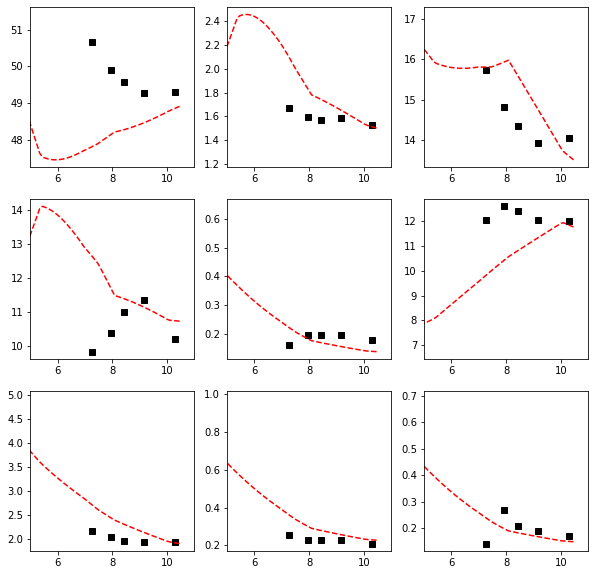

In [5]:
f, a = plt.subplots(3,3, figsize = (10,10))

Pressure = 1000

Elements = [['SiO2', 'TiO2', 'Al2O3'], ['FeOt', 'MnO', 'CaO'], ['Na2O', 'K2O', 'P2O5']]

Results['P = ' + str(Pressure) + ' bars']['liquid1']['FeOt'] = Results['P = ' + str(Pressure) + ' bars']['liquid1']['FeO']+ Results['P = ' + str(Pressure) + ' bars']['liquid1']['Fe2O3']*(71.844/(159.69/2))
for i in range(3):
    for j in range(3):
        a[i][j].plot(Exp['MgO'][(Exp['Series'] == "STA") & (Exp['P_MPa'] == Pressure/10)],
                Exp[Elements[i][j]][(Exp['Series'] == "STA") & (Exp['P_MPa'] == Pressure/10)],
                'sk')
        a[i][j].plot(Results['P = ' + str(Pressure) + ' bars']['liquid1']['MgO'],
                    Results['P = ' + str(Pressure) + ' bars']['liquid1'][Elements[i][j]],
                    '--r')
        a[i][j].set_xlim([5, 11])

In [14]:
bulk = {'SiO2_Liq': Exp['SiO2'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'TiO2_Liq': Exp['TiO2'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'Al2O3_Liq': Exp['Al2O3'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'Cr2O3_Liq': Exp['Cr2O3'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'FeOt_Liq': Exp['FeOt'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0],  
        'MgO_Liq': Exp['MgO'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'CaO_Liq': Exp['CaO'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'Na2O_Liq': Exp['Na2O'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'K2O_Liq': Exp['K2O'][(Exp['Series'] == 'STA') & (Exp['Experiment'] == "synthesis")].values[0], 
        'H2O_Liq': 2, 
       'Fe3Fet': 0.15}

In [15]:
Results = M.multi_crystallise(cores = 20, Model = "Holland", comp = bulk, 
                         T_start_C = 1260.0, T_end_C = 1050.0, dt_C = 2, P_bar = P, find_liquidus = True)

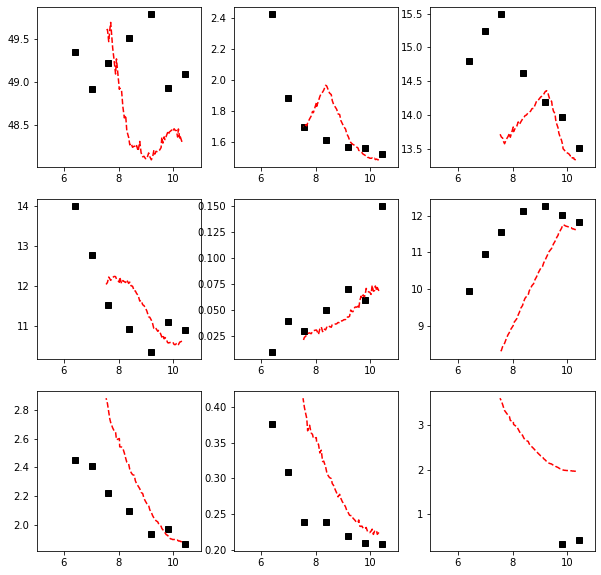

In [17]:
f, a = plt.subplots(3,3, figsize = (10,10))

Pressure = 3000

Elements = [['SiO2', 'TiO2', 'Al2O3'], ['FeOt', 'Cr2O3', 'CaO'], ['Na2O', 'K2O', 'H2O']]

Results['P = ' + str(Pressure) + ' bars']['liq']['FeOt'] = Results['P = ' + str(Pressure) + ' bars']['liq']['FeO']
for i in range(3):
    for j in range(3):
        a[i][j].plot(Exp['MgO'][(Exp['Series'] == "STA") & (Exp['P_MPa'] == Pressure/10)],
                Exp[Elements[i][j]][(Exp['Series'] == "STA") & (Exp['P_MPa'] == Pressure/10)],
                'sk')
        a[i][j].plot(Results['P = ' + str(Pressure) + ' bars']['liq']['MgO']*100,
                    Results['P = ' + str(Pressure) + ' bars']['liq'][Elements[i][j]]*100,
                    '--r')
        a[i][j].set_xlim([5, 11])